# K-means Clustering: Detecting fake bank notes.
### Coursera Course : "Foundations of Data Science: K-means Clustering in Python".
### Final Course Project

The purpose of this project was to determine if we could decipher original banknotes from forged banknotes using the K-means clustering method. 

The “Banknote authentication datset” was obtained from OpenML. To produce this dataset images were taken of both genuine and forged banknotes and the images were Wavelet Transformed to extract features from these images. The original data consists of several columns but for the purpose of this assessment the data was trimmed to include only two columns (V1 representing variance of Wavelet transformed image and V2 representing skewness of Wavelet transformed image). 

In [2]:
# import the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# Although the data has more than 2 features, only the top 2 (V1 and V2) were used for the purpose of this analysis.
# The final dataset has 2 features and 1372 rows.
data = pd.read_csv("banknote-authentication-dataset.csv")
data.sort_values('V2', inplace = True)
print(data)

          V1       V2
942  -3.3793 -13.7731
1064 -3.6961 -13.6779
1125 -3.5985 -13.6593
820  -4.0025 -13.4979
1369 -3.7503 -13.4586
...      ...      ...
220  -2.2261  12.5398
516  -2.3983  12.6060
740  -2.4473  12.6247
562  -2.4604  12.7302
126  -2.3430  12.9516

[1372 rows x 2 columns]


Column V1 ranges from -7.0421 to 6.8248 while column V2 has a range of -13.7731 to 12.9516. Thus a decision was made not to standardise the data.

In [4]:
V1 = data['V1']
V2 = data['V2']

In [30]:
# Summary statistics to get an idea of the spread of data.
mean1 = V1.mean()
std1 = V1.std()
print( mean1, std1)

mean2 = V2.mean()
std2 = V2.std()
print(mean2, std2)

0.43373525728862977 2.8427625862451675
1.9223531209912554 5.8690467435803795


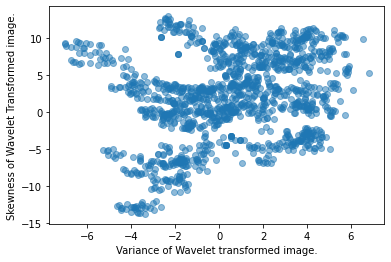

In [19]:
# Plotting the data as is to see the distribution.
plt.xlabel('Variance of Wavelet transformed image.')
plt.ylabel('Skewness of Wavelet Transformed image.')
plt.scatter(V1, V2, alpha = 0.5)

In [7]:
# Running K-means clustering and viewing cluster centres.
column = np.column_stack((V1, V2))
results = KMeans(n_clusters = 2).fit(column)
clusters = results.cluster_centers_
print(clusters)

[[-0.13923853 -3.45415269]
 [ 0.88169658  6.12580312]]


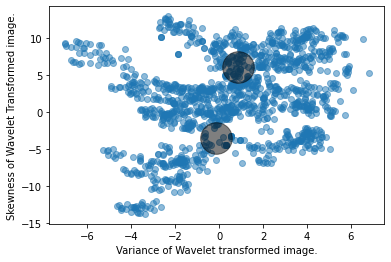

In [23]:
# Plotting K-means clustering results.
plt.xlabel('Variance of Wavelet transformed image.')
plt.ylabel('Skewness of Wavelet Transformed image.')
plt.scatter(V1, V2, alpha = 0.5)
plt.scatter(clusters[:,0], clusters[:,1], s = 1000,  alpha = 0.5, marker = "o", color = "black")

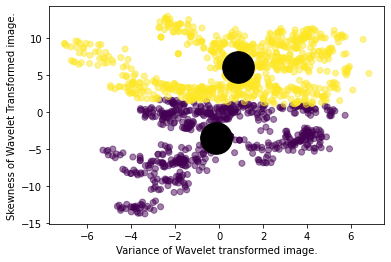

In [22]:
# Now colour the clusters differently to better visualise them.
plt.xlabel('Variance of Wavelet transformed image.')
plt.ylabel('Skewness of Wavelet Transformed image.')
plt.scatter(V1, V2, alpha = 0.5, c = results.labels_.astype(float))
plt.scatter(clusters[:,0], clusters[:,1], s = 1000,   marker = "o", color = 'black')

### Concluding remarks
We are looking for either real or forged bank notes and thus the value of K has been set to 2. The results dectected two clusters that are centered around the centroids (which are indicated by black circles). The results of the algorithm are stable and have produced the same centroids consistently. The results show a group with higher variance and higher skewness and a second group with lower variance and lower skewness.